# LeNet-5

LeNet은 CNN을 처음으로 개발한 얀 르쿤(Yann Lecun) 연구팀이 1998년에 개발한 CNN 알고리즘의 이름이다.
original 논문 제목은 "Gradient-based learning applied to document recognition"이다.

![이미지](https://t1.daumcdn.net/cfile/tistory/99170D4C5C7E21250E)
그림1. LeNet-5의 구조

INPUT, 3개의 컨볼루션 레이어(C1, C3, C5), 2개의 서브샘플링 레이어(S2, S4), 1층의 full-connected 레이어(F6), OUTPUT 레이어로 구성되어 있다. 참고로 C!부터 F6까지 활성화 함수 tanh을 사용한다.

**1) C1 레이어:** 입력 영상(여기서는 32x32 사이즈의 이미지)을 6개의 5x5 필터의 컨볼루션 연산을 해준다. 그 결과 6장의 28x28 특성 맵을 얻게 된다.

```훈련해야할 파라미터 개수: (가중치*입력맵개수 + 바이어스)*특성맵개수 = (5*5*1+1)*6 = 156```

**2) S2 레이어:** 6장의 28x28 특성 맵에 대해 서브샘플링을 진행한다. 결과적으로 28x28 사이즈의 특성 맵이 14x14 사이즈의 특성맵으로 축소된다. 2x2 필터를 stride 2로 설정해서 서브샘플링해주기 때문이다. 사용하는 서브샘플링 방법은 평균 풀링(average pooling)이다.

```훈련해야할 파라미터 개수: (가중치 + 바이어스)*특성맵개수 = (1+1)*6 = 12```

평균풀링인데 왜 훈련해야할 파라미터가 필요한지 의아할 수 있는데, original 논문에 의하면 평균을 낸 후에 한 개의 훈련가능한 가중치(trainable weight)를 곱해주고 또 한 개의 훈련가능한 바이어스(trainable bias)를 더해준다고 한다. 그 값이 시그모이드 함수를 통해 활성화된다. 참고로 그 가중치와 바이어스는 시그모이드의 비활성도를 조절해준다고 한다.

**3) C3 레이어:** 6장의 14x14 특성맵에 컨볼루션 연산을 수행해서 16장의 10x10 특성맵을 산출해낸다. 
 - 6장의 14x14 특성맵에서 연속된 3장씩을 모아서 5x5x3 사이즈의 필터와 컨볼루션 해준다(그림 열0~5). 6장의 10x10 특성맵이 산출된다.
 - 6장의 14x14 특성맵에서 연속된 4장씩을 모아서 5x5x4 사이즈의 필터와 컨볼루션 해준다(그림 열6~11). 6장의 10x10 특성맵이 산출된다.
 - 6장의 14x14 특성맵에서 불연속한 4장씩을 모아서 5x5x4 사이즈의 필터와 컨볼루션 해준다(그림 열12~14). 3장의 10x10 특성맵이 산출된다.
 - 마지막으로 6장의 14x14 특성맵 모두를 가지고 5x5x6 사이즈의 필터와 컨볼루션 해준다(그림 열15). 1장의 10x10 특성맵이 산출된다. 
 
 결과적으로 16장(6+6+3+1)의 10x10 특성맵을 얻게 되었다.
 
 ![이미지](https://t1.daumcdn.net/cfile/tistory/9902AD375C7F2B3E1A)
 그림2. C3에서 6장의 14x14 특성맵을 조합하는 방법

```훈련해야할 파라미터 개수:
첫번째그룹 => (가중치*입력맵개수+바이어스)*특성맵 개수 = (5*5*3+1)*6 = 456
두번째그룹 => (가중치*입력맵개수+바이어스)*특성맵 개수 = (5*5*4+1)*6 = 606
세번째그룹 => (가중치*입력맵개수+바이어스)*특성맵 개수 = (5*5*4+1)*3 = 303
네번째그룹 => (가중치*입력맵개수+바이어스)*특성맵 개수 = (5*5*6+1)*1 = 151
456+606+303+151=1516```

**4) S4 레이어:** 16장의 10x10 특성 맵에 대해서 서브샘플링을 진행해 16장의 5x5 특성 맵으로 축소시킨다.

```훈련해야할 파라미터 개수: (가중치 + 바이어스)*특성맵개수 = (1+1)*16 = 32```

**5) C5 레이어:** 16장의 5x5 특성 맵을 120개 5x5x16 사이즈의 필터와 컨볼루션 해준다.
결과적으로 120개 1x1 특성맵이 산출된다.

```훈련해야할 파라미터 개수: (가중치*입력맵개수 + 바이어스)*특성맵개수 = (5*5*16+1)*120 = 48120```

**6) F6 레이어:** 84개의 유닛을 가진 피드포워드 신경망이다. C5의 결과를 84개의 유닛에 연결시킨다.

```훈련해야할 파라미터 개수: 연결개수 = (입력개수 + 바이어스)*출력개수 = (120+1)*84 = 10164```

**7) 아웃풋 레이어:** 10개의 Euclidean radial basis function(RBF) 유닛들로 구성되어있다. 각각 F6의 84개 유닛으로부터 인풋을 받는다. 최종적으로 이미지가 속한 클래스를 알려준다.

LeNet-5를 제대로 가동하기 위해 훈련해야할 파라미터는 
총 156+12+1516+32+48120+10164=60000개다.

In [1]:
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
print(tf.__version__) # 1.14.0 ---> 2.1.0
   
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)
from tensorflow.python.client import device_lib
from tensorflow import keras
    
import sys    
import os
from PIL import Image
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

2.4.1


In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data () 
train_x = train_x / 255.0 
test_x = test_x / 255.0
train_x = tf.expand_dims (train_x, 3) 
test_x = tf.expand_dims (test_x, 3)
val_x = train_x [: 5000] 
val_y = train_y [: 5000]

In [3]:
lenet_5_model = keras.models.Sequential ([ 
    keras.layers.Conv2D (6, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = train_x [0] .shape, padding = 'same'), # C1 
    keras .layers.AveragePooling2D (), # S2 
    keras.layers.Conv2D (16, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'), # C3 
    keras.layers.AveragePooling2D (), # S4 
    keras.layers.Flatten (), #Flatten 
    keras.layers.Dense (120, activation = 'tanh'), # C5 
    keras.layers.Dense (84, activation = 'tanh'), # F6 
    keras.layers.Dense ( 10, activation = 'softmax') # 출력 레이어 
])

In [4]:
lenet_5_model.compile (optimizer = 'adam', loss = keras.losses.sparse_categorical_crossentropy, metrics = [ 'accuracy'])

In [5]:
hist=lenet_5_model.fit (train_x, train_y, epochs = 19, validation_data = (val_x, val_y))

Epoch 1/19
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4057 - accuracy: 0.8814 - val_loss: 0.1275 - val_accuracy: 0.9596
Epoch 2/19
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0947 - accuracy: 0.9706 - val_loss: 0.0562 - val_accuracy: 0.9854
Epoch 3/19
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0623 - accuracy: 0.9803 - val_loss: 0.0478 - val_accuracy: 0.9868
Epoch 4/19
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.0314 - val_accuracy: 0.9904
Epoch 5/19
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0360 - accuracy: 0.9881 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 6/19
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0204 - val_accuracy: 0.9936
Epoch 7/19
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0194 - val_ac

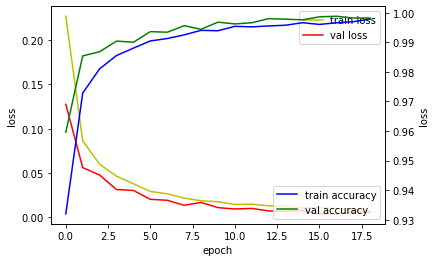

In [7]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('loss')

loss_ax.legend(loc='best')
acc_ax.legend(loc='best')

plt.show()

In [9]:
lenet_5_model.save('box.h5')

In [10]:
lenet_5_model.evaluate (test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0560 - accuracy: 0.9866


[0.05599351227283478, 0.9865999817848206]

In [11]:
test_pre=lenet_5_model.predict (test_x)
print("test_pre :", test_pre[0])
# print("pre_label :", np.argmax(test_pre[10]))
print("test_y :", test_y[0])
print(np.argmax(test_pre[0]))

test_pre : [5.6722448e-12 8.7337160e-09 2.5752794e-08 1.8155687e-07 1.0042312e-07
 5.4987931e-10 1.8081623e-15 9.9999917e-01 1.7199271e-10 4.3544671e-07]
test_y : 7
7


In [12]:
def predict_img(test_path):
    
    test_datas = []
    img = Image.open(test_path).convert('L')
    resize_img = img.resize((28, 28))
    img_cv = np.array(resize_img)
    test_datas.append(img_cv)

       
    np_data = np.array(test_datas)

    
    d_size = np_data.shape[0]
    d_width = np_data.shape[1]
    d_height = np_data.shape[2]
    d_rgb = 1
    
    test_size = np_data.shape[0]
    
    
    X_test1 = np_data.reshape((test_size, d_width, d_height, 1))
    X_test1 = X_test1 / 255.0

    

    test_pre = lenet_5_model.predict(X_test1)
    print("test_pre :", test_pre[0])
    print("pre_label :", np.argmax(test_pre[0]))
    plt.imshow(cv2.cvtColor(np_data[0], cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

testPath : D:/ksu/Box/0.jpg
[[[234 232 232 236 232 232 233 228 222 220 221 214 210 210 207 218 224
   222 226 228 224 220 225 230 230 228 228 230]
  [234 235 236 233 230 232 233 226 215 196 171 162 157 155 156 170 184
   197 212 220 221 228 230 232 236 234 231 230]
  [236 233 233 236 231 228 226 221 211 192 163 140 130 132 143 155 162
   163 175 183 191 210 220 227 233 230 225 222]
  [235 234 233 234 230 227 223 213 210 201 177 171 166 165 178 188 188
   177 178 179 183 193 209 222 228 227 225 225]
  [234 233 235 235 215 198 184 171 166 162 158 162 158 154 161 173 181
   184 191 195 198 200 212 224 232 231 231 231]
  [234 234 235 234 206 181 162 142 125 120 130 134 137 141 140 145 151
   157 164 174 188 202 214 224 234 232 226 221]
  [233 234 233 228 212 198 183 158 136 128 139 149 164 177 174 164 153
   144 136 141 160 187 204 217 228 224 210 199]
  [234 233 231 226 213 200 188 175 160 158 177 187 194 198 198 190 179
   170 163 162 168 185 196 208 220 213 200 189]
  [233 237 235 219 2

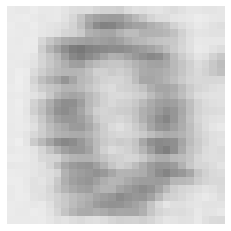

In [13]:
testPath = 'D:/ksu/Box/0.jpg'
print('testPath : %s' % testPath)
predict_img(testPath)

testPath : D:/ksu/Box/0 (2).jpg
[[[119 115 114 119 123 123 121 124 126 124 118 118 119 122 127 123 118
   116 121 123 122 120 121 121 116 118 121 124]
  [119 119 118 119 122 122 118 119 117 115 114 115 118 120 116 114 115
   121 122 121 119 120 123 124 118 116 117 119]
  [116 118 119 115 117 116 113 116 115 116 122 110 110 114 109 105 104
   105 109 115 118 113 118 121 118 118 118 118]
  [117 118 116 110 115 117 117 118 109 102 101  94  87  79  74  74  76
    75  81  95 108 108 112 114 114 117 120 120]
  [119 119 116 113 116 116 116 114 104  91  82  76  68  60  57  58  60
    60  61  69  81  94 104 110 114 118 120 121]
  [116 117 119 121 120 115 109 102  93  81  68  61  63  72  80  77  71
    67  63  61  64  78  93 105 112 117 120 120]
  [114 115 119 123 120 115 106  94  82  69  58  60  72  89 105 104  94
    83  76  69  65  69  78  91 103 113 117 117]
  [120 120 118 113 112 110 105  96  82  71  67  79  90  98 106 109 105
    96  83  71  63  60  65  77  93 106 111 112]
  [114 118 118 1

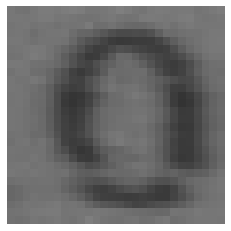

In [14]:
testPath = 'D:/ksu/Box/0 (2).jpg'
print('testPath : %s' % testPath)
predict_img(testPath)

testPath : D:/ksu/Box/1 (1).jpg
[[[201 201 204 210 215 214 207 200 190 183 180 164 162 165 156 175 195
   203 204 212 216 198 205 214 214 216 211 204]
  [181 187 198 206 199 199 203 198 195 187 174 179 169 155 169 175 180
   186 197 206 213 215 216 217 218 215 215 217]
  [184 194 202 202 201 198 193 185 175 163 154 156 165 174 173 186 194
   189 190 199 209 209 208 207 208 214 221 226]
  [182 192 197 193 193 190 182 167 150 133 120 126 135 147 157 162 174
   196 200 206 212 205 209 212 210 206 211 219]
  [182 191 194 187 183 178 169 150 134 118 107 109 115 126 148 160 171
   188 200 205 208 213 208 203 203 205 208 212]
  [185 194 198 188 189 180 162 147 130 118 114 113 120 134 152 173 184
   180 193 198 200 214 209 204 206 212 211 209]
  [191 198 201 195 196 189 175 166 151 139 133 132 138 148 158 170 183
   190 194 196 198 201 212 219 218 214 209 206]
  [204 204 204 202 190 189 194 190 187 177 162 153 152 157 164 171 184
   201 197 196 199 195 202 208 207 210 207 203]
  [203 201 202 2

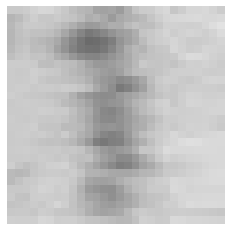

In [15]:
testPath = 'D:/ksu/Box/1 (1).jpg'
print('testPath : %s' % testPath)
predict_img(testPath)

testPath : D:/ksu/Box/1 (2).jpg
[[[121 122 124 125 124 120 116 123 125 126 128 120 119 121 116 116 118
   121 122 125 126 120 123 128 130 125 124 127]
  [123 123 123 122 124 124 124 121 123 125 123 119 117 115 111 109 111
   118 119 119 118 120 123 125 128 124 124 126]
  [122 123 125 124 126 126 126 119 124 128 123 118 107  96  97 100 105
   112 119 123 125 129 125 123 127 124 125 127]
  [118 121 125 125 125 124 122 117 121 122 114 103  93  86  87  94 105
   116 121 120 118 124 125 127 129 129 129 129]
  [115 119 123 124 124 124 122 121 117 108  96  80  70  68  74  89 103
   113 117 119 119 120 123 126 127 128 128 128]
  [119 119 119 120 122 121 117 114 101  85  74  59  53  56  65  83  98
   105 109 116 124 123 123 122 122 125 124 123]
  [124 121 117 116 116 110 100  90  75  61  55  50  51  57  64  81  97
   106 108 114 121 126 125 123 122 125 123 121]
  [123 122 119 115 112 105  94  80  72  65  61  60  55  52  65  84 101
   109 115 120 123 121 125 127 125 129 128 125]
  [120 121 121 1

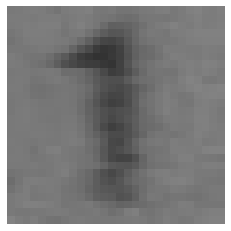

In [16]:
testPath = 'D:/ksu/Box/1 (2).jpg'
print('testPath : %s' % testPath)
predict_img(testPath)

testPath : D:/ksu/Box/2 (2).jpg
[[[188 190 190 185 183 188 192 184 183 182 180 185 183 177 175 178 180
   179 187 190 189 191 189 187 189 191 190 189]
  [186 182 180 183 184 186 185 180 177 174 168 151 143 140 132 144 158
   163 181 184 178 186 189 191 194 187 184 185]
  [179 181 184 189 179 167 157 144 129 119 113 109 105 101  99 105 122
   148 166 175 180 188 191 192 192 186 180 177]
  [179 184 186 179 158 141 129 118 103  94  94  94  94  93  91  86  94
   118 137 154 170 182 182 185 195 191 190 191]
  [170 171 167 155 135 117 106 103 106 112 118 126 126 119 109  95  91
   102 123 145 165 179 181 182 188 188 186 186]
  [152 156 157 146 128 107  93  97 116 136 147 163 164 154 141 123 107
   100 111 129 150 167 178 181 178 178 178 179]
  [132 147 155 143 123 103  91 101 123 146 162 173 175 171 162 151 131
   105 102 108 123 143 164 177 177 175 180 187]
  [124 134 137 125 107  95  93 109 130 154 176 174 175 176 166 162 147
   120 114 110 111 130 154 172 177 183 185 184]
  [171 164 155 1

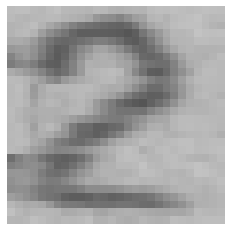

In [17]:
testPath = 'D:/ksu/Box/2 (2).jpg'
print('testPath : %s' % testPath)
predict_img(testPath)